In [1]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

<IPython.core.display.Javascript object>

In [5]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%-m/%-d/%y, %I:%M %p - ',
        '24hr' : '%-m/%-d/%y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [12]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%m/%d/%y, %I:%M %p - ',
        '24hr' : '%m/%d/%y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [13]:
df = rawToDf('/Users/bhavikprajapati/Downloads/chat-data.txt', '12hr')

In [14]:
df.head()


,date_time,user,msg
0,2019-05-31 05:26:00,grp_notif,Messages to this group are now secured with en...
1,2019-05-30 23:06:00,grp_notif,"Anuj Singh created group ""Spartan 2"""
2,2019-05-30 23:06:00,grp_notif,Anuj Singh added you
3,2019-05-30 23:07:00,Anuj Singh,Ab se ye group Mai message karo vo Wala delete...
4,2019-05-31 11:58:00,Anuj Singh,<Media omitted>


In [15]:
df.tail()

,date_time,user,msg
9386,2020-04-28 21:53:00,Anuj Singh,meghank ye video bana tu
9387,2020-04-28 22:03:00,bhavik,<Media omitted>
9388,2020-04-28 22:06:00,bhavik,<Media omitted>
9389,2020-04-28 22:06:00,bhavik,@918369923001
9390,2020-04-28 23:31:00,Mahiman Dave,😂😂😂😂😂


In [16]:
me = "bhavik"

In [17]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(827, 3)

In [18]:
df["user"].unique()

array(['grp_notif', 'Anuj Singh', 'Mahiman Dave', 'bhavik',
       'Meghank Upadhyay', 'Ashish Roy', 'Amit Dubey'], dtype=object)

In [19]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(29, 3)

In [20]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [21]:
df.tail()

,date_time,user,msg
9383,2020-04-28 16:35:00,Mahiman Dave,Bro don't send such toxic videos
9384,2020-04-28 17:01:00,bhavik,I don't know what is this guy upto or what kin...
9386,2020-04-28 21:53:00,Anuj Singh,meghank ye video bana tu
9389,2020-04-28 22:06:00,bhavik,@918369923001
9390,2020-04-28 23:31:00,Mahiman Dave,😂😂😂😂😂


In [22]:
df.reset_index(inplace=True, drop=True)
df.shape

(8535, 3)

In [23]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Anuj Singh          3766
Mahiman Dave        2129
bhavik              1270
Ashish Roy           585
Meghank Upadhyay     498
Amit Dubey           287
Name: msg, dtype: int64

In [24]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [25]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

😂 - 186
🏼 - 16
🙌 - 12
🔥 - 11
💥 - 10
🏽 - 7
♂ - 6
💋 - 6
🥺 - 5
🤯 - 5


In [32]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name())

In [33]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [34]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Anuj Singh          3766
Mahiman Dave        2129
bhavik              1270
Ashish Roy           585
Meghank Upadhyay     498
Amit Dubey           287
Name: user, dtype: int64

In [35]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Anuj Singh', 'Mahiman Dave', 'bhavik', 'Ashish Roy', 'Meghank Upadhyay']

In [46]:
comment_words = ' '
stopwords = STOPWORDS.update(['kiya','kuch','kar','ye','tu','se','bhi','ko','nahi',
                              'haa','lo', 'ge', 'Lo', 'mai','aur','tha','ka','kya',
                              'abhi','toh','raha','nahi','illa', 'yea', 'ella', 'en', 
                              'na', 'En', 'yeah', 'alli','bhai','hai', 'ide','toh', 'okay',
                              'ok', 'will','done','koi','hoga','sab','log'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

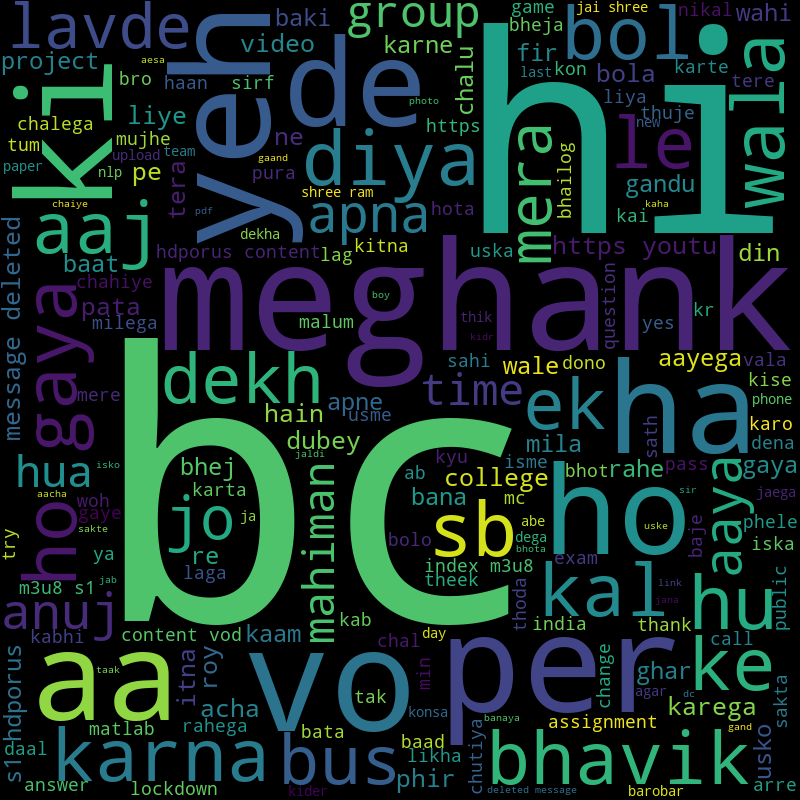

In [47]:
wordcloud.to_image()

In [48]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,hour,weekday,is_weekend
0,2019-05-30 23:07:00,Anuj Singh,Ab se ye group Mai message karo vo Wala delete...,23,Thursday,False
1,2019-05-31 11:58:00,Anuj Singh,This is dwm part in ERP just read it..,11,Friday,False
2,2019-05-31 11:58:00,Anuj Singh,Part of syllabus,11,Friday,False
3,2019-05-31 12:15:00,Mahiman Dave,👍🏻👍🏻,12,Friday,False
4,2019-05-31 13:07:00,Anuj Singh,https://youtu.be/HKOJY0cU63E,13,Friday,False


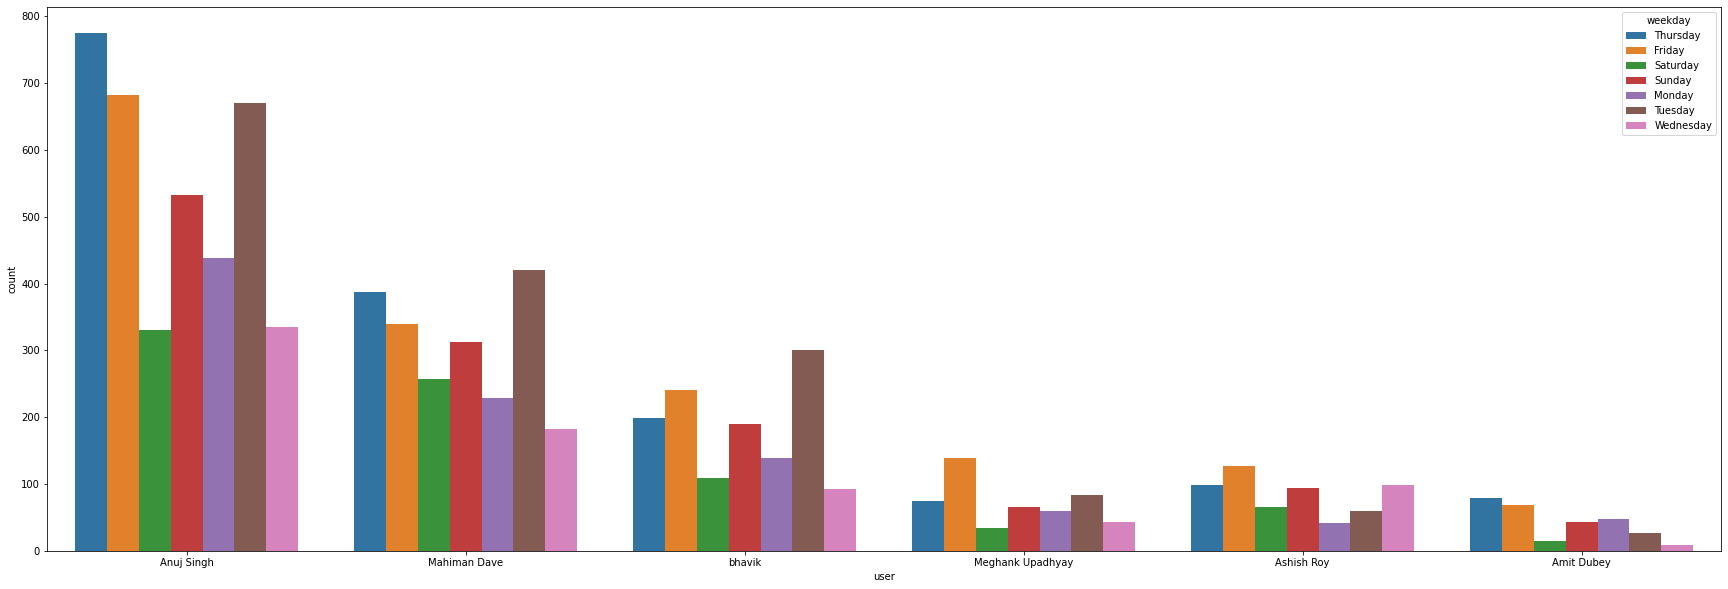

In [51]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df)

In [52]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

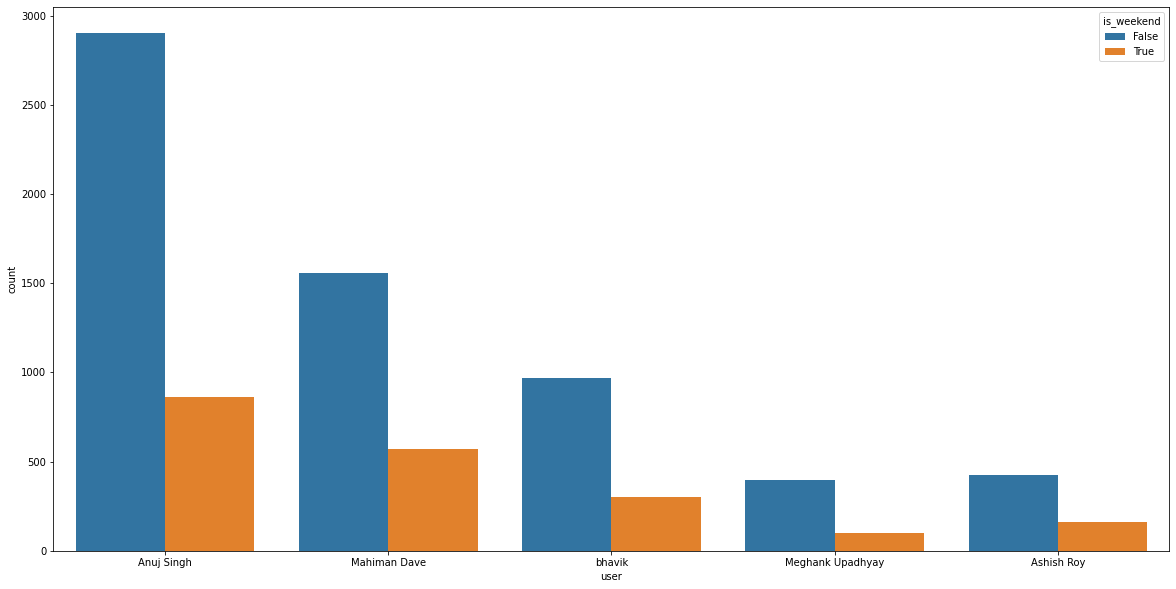

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [54]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,117.0,128.0,41.0,78.0,183.0,109.0,44.0
1,13.0,7.0,22.0,15.0,213.0,3.0,1.0
2,NaN,NaN,5.0,2.0,9.0,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,1.0,NaN,1.0,NaN


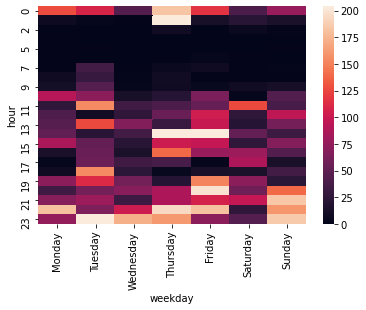

In [59]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

In [60]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[  30   33   34 ... 8509 8531 8533] (1270,)


In [61]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[  29   32   33 ... 8508 8530 8532] (1270,)


In [62]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(1270, 6)

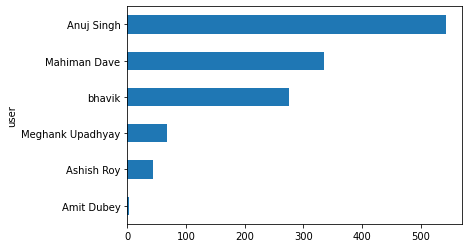

In [63]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')